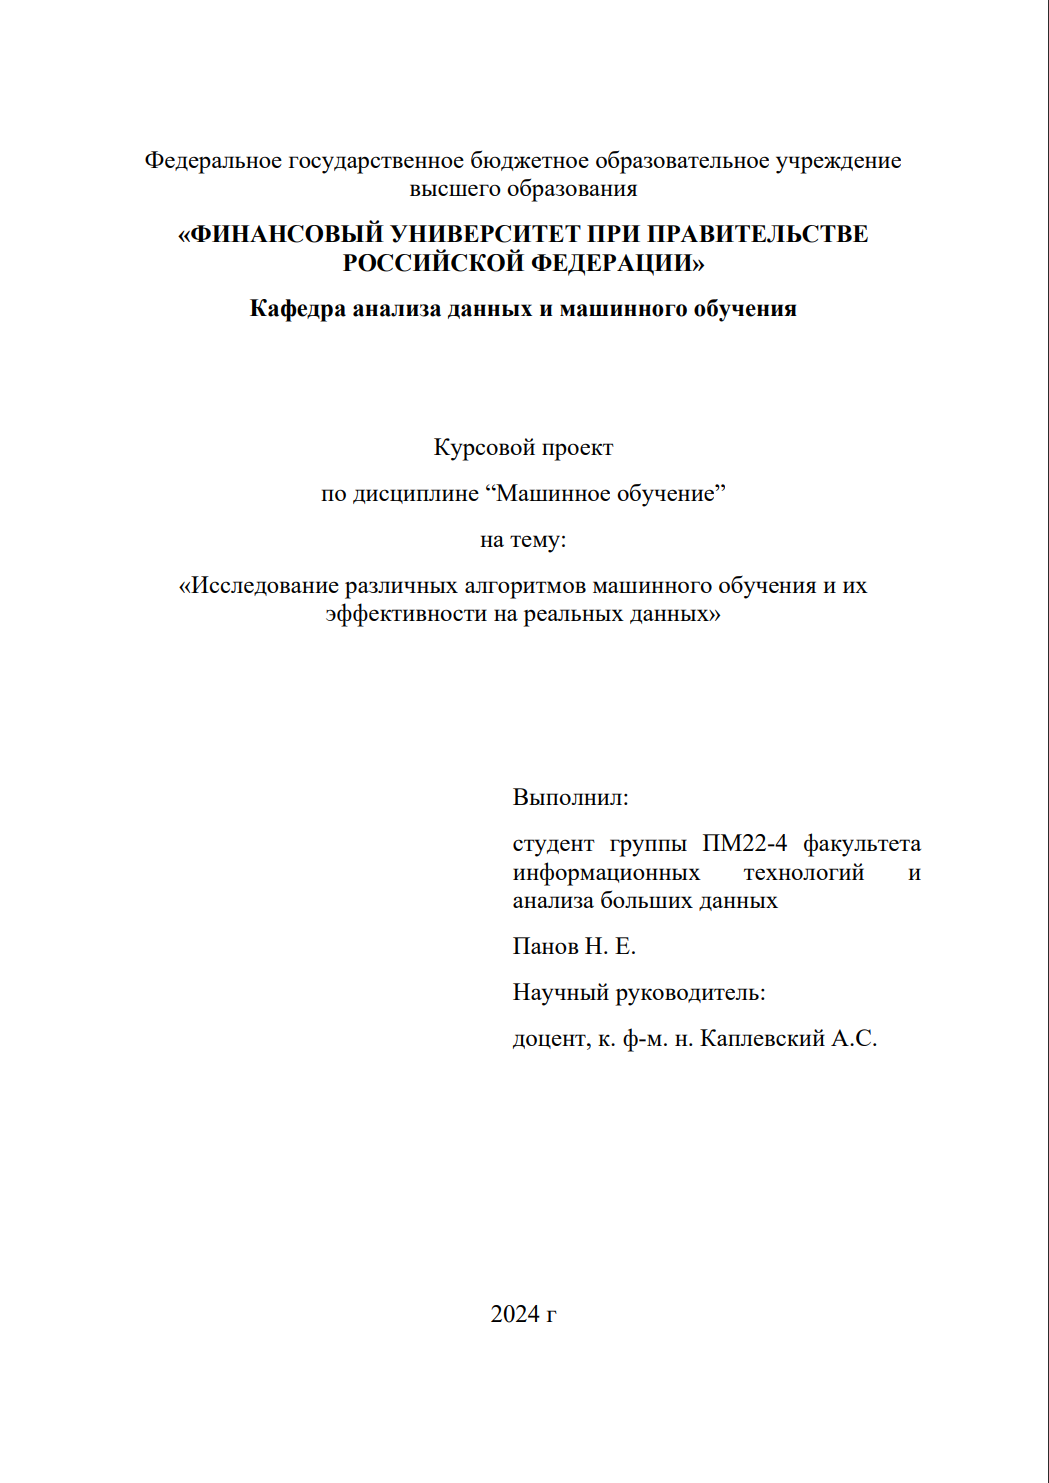


In [230]:
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import *
import numpy as np
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler 
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import time
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier
from yellowbrick.model_selection import LearningCurve

### Для анализа выбран датасет из базы библиотеки scikit-learn. Он содержит исчерпывающие данные об отдельных людях, реально проживающим на территории США.


In [231]:
print(fetch_openml('adult', parser='auto').DESCR)

**Author**: Ronny Kohavi and Barry Becker  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996-05-01  
**Please cite**: Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996  

**Note: This dataset is not the original UCI dataset. It has some discretized features. See version 2 for the original.**

Prediction task is to determine whether a person makes over 50K a year. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Ronny Kohavi and Barry Becker. Data Mining and Visualization, Silicon Graphics.  
e-mail: ronnyk '@' live.com for questions.

Downloaded from openml.org.


### Из описания датасета понятно, что в датасете содержатся данные переписи населения США 1994 года. Задача прогнозирования - классификационная оценка заработной платы человека - более 50000$ в год или менее этой суммы.


In [232]:
df = fetch_openml("adult", version=2).frame

### Изучим информацию о предоставленном датасете.


In [233]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


### Видим небольшой процент пропущенных значений, из чего делаем вывод что лучшим решением будет оставить только полностью заполненные строки.


In [235]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  category
 2   fnlwgt          45222 non-null  int64   
 3   education       45222 non-null  category
 4   education-num   45222 non-null  int64   
 5   marital-status  45222 non-null  category
 6   occupation      45222 non-null  category
 7   relationship    45222 non-null  category
 8   race            45222 non-null  category
 9   sex             45222 non-null  category
 10  capital-gain    45222 non-null  int64   
 11  capital-loss    45222 non-null  int64   
 12  hours-per-week  45222 non-null  int64   
 13  native-country  45222 non-null  category
 14  class           45222 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.5 MB


### Итоговый датасет содержит больше 45 тысяч строк, потери в процентном отношении были действительно невелики. Проверим классы на дисбаланс.


In [237]:
df['class'].value_counts()

class
<=50K    34014
>50K     11208
Name: count, dtype: int64

### Дисбаланса классов не наблюдается. приступим к обработке нечисловых признаков.


### Начнём по порядку со столбца workclass.


In [238]:
df.workclass.value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Never-worked            0
Name: count, dtype: int64

### Заменим значения в этом столбце на числовые следующим образом:


In [239]:
df['workclass'] = df['workclass'].replace({
    'Private': 3,
    'Self-emp-not-inc': 1,
    'Self-emp-inc': 2,
    'Federal-gov': 6,
    'Local-gov': 4,
    'State-gov': 5,
    'Without-pay': 0,
    'Never-worked': 0
})

In [240]:
df['workclass'] = df['workclass'].astype(int)

In [241]:
df.workclass.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45222 entries, 0 to 45221
Series name: workclass
Non-Null Count  Dtype
--------------  -----
45222 non-null  int32
dtypes: int32(1)
memory usage: 176.8 KB


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  int32   
 2   fnlwgt          45222 non-null  int64   
 3   education       45222 non-null  category
 4   education-num   45222 non-null  int64   
 5   marital-status  45222 non-null  category
 6   occupation      45222 non-null  category
 7   relationship    45222 non-null  category
 8   race            45222 non-null  category
 9   sex             45222 non-null  category
 10  capital-gain    45222 non-null  int64   
 11  capital-loss    45222 non-null  int64   
 12  hours-per-week  45222 non-null  int64   
 13  native-country  45222 non-null  category
 14  class           45222 non-null  category
dtypes: category(8), int32(1), int64(6)
memory usage: 2.6 MB


### Переходим к столбцу education.


In [243]:
df.education.value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [244]:
df['education-num'].value_counts()

education-num
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: count, dtype: int64

### Видим, что предобработка этого нечислового столбца уже проведена автором датасета в следующем столбце, так что столбец education мы можем просто не использовать.


In [245]:
df.drop('education', axis=1, inplace=True)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  int32   
 2   fnlwgt          45222 non-null  int64   
 3   education-num   45222 non-null  int64   
 4   marital-status  45222 non-null  category
 5   occupation      45222 non-null  category
 6   relationship    45222 non-null  category
 7   race            45222 non-null  category
 8   sex             45222 non-null  category
 9   capital-gain    45222 non-null  int64   
 10  capital-loss    45222 non-null  int64   
 11  hours-per-week  45222 non-null  int64   
 12  native-country  45222 non-null  category
 13  class           45222 non-null  category
dtypes: category(7), int32(1), int64(6)
memory usage: 2.5 MB


### Переходим к столбцу marital-status.


In [247]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

### Здесь разделим людей на никогда не женатых, ныне женатых и прежде женатых.


In [248]:
df['marital-status'] = df['marital-status'].replace({
    'Never-married': 0,
    'Married-civ-spouse': 2,
    'Divorced': 1,
    'Married-spouse-absent': 1,
    'Separated': 1,
    'Married-AF-spouse': 2,
    'Widowed': 1
})

In [249]:
df['marital-status'] = df['marital-status'].astype(int)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  int32   
 2   fnlwgt          45222 non-null  int64   
 3   education-num   45222 non-null  int64   
 4   marital-status  45222 non-null  int32   
 5   occupation      45222 non-null  category
 6   relationship    45222 non-null  category
 7   race            45222 non-null  category
 8   sex             45222 non-null  category
 9   capital-gain    45222 non-null  int64   
 10  capital-loss    45222 non-null  int64   
 11  hours-per-week  45222 non-null  int64   
 12  native-country  45222 non-null  category
 13  class           45222 non-null  category
dtypes: category(6), int32(2), int64(6)
memory usage: 2.7 MB


### Переходим к столбцу occupation.


In [251]:
df['occupation'].value_counts()


occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

### Сначала обобщим некоторые схожие специальности и избавимся от непоказательных ввиду малой выборки вооруженных сил.


In [252]:
df['occupation'] = df['occupation'].replace({
    'Other-service': 'Service',
    'Protective-serv': 'Service',
    'Priv-house-serv': 'Service',
    'Craft-repair': 'Cars',
    'Machine-op-inspct': 'Cars',
    'Transport-moving': 'Cars'
})

df = df[df['occupation'] != 'Armed-Forces']
df.reset_index(inplace=True, drop=True)

### Теперь создадим датасет с дамми переменными по столбцу профессий и присоединим его к основному.


In [253]:
df = pd.concat([df, pd.get_dummies(df['occupation'])], axis=1)
df.drop('occupation', axis=1, inplace=True)
df.drop('Armed-Forces', axis=1, inplace=True)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45208 entries, 0 to 45207
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45208 non-null  int64   
 1   workclass          45208 non-null  int32   
 2   fnlwgt             45208 non-null  int64   
 3   education-num      45208 non-null  int64   
 4   marital-status     45208 non-null  int32   
 5   relationship       45208 non-null  category
 6   race               45208 non-null  category
 7   sex                45208 non-null  category
 8   capital-gain       45208 non-null  int64   
 9   capital-loss       45208 non-null  int64   
 10  hours-per-week     45208 non-null  int64   
 11  native-country     45208 non-null  category
 12  class              45208 non-null  category
 13  Adm-clerical       45208 non-null  bool    
 14  Cars               45208 non-null  bool    
 15  Exec-managerial    45208 non-null  bool    
 16  Farm

### Переходим к столбцу relationship.


In [255]:
df['relationship'].value_counts()

relationship
Husband           18661
Not-in-family     11697
Own-child          6624
Unmarried          4788
Wife               2091
Other-relative     1347
Name: count, dtype: int64

### Посколько мы используем признак семейное положение - этот классификатор будет избыточным. Просто избавимся от него.


In [256]:
df.drop('relationship', axis=1, inplace=True)

### Переходим к столбцу race.


In [257]:
df['race'].value_counts()

race
White                 38891
Black                  4227
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      434
Other                   353
Name: count, dtype: int64

### Создадим дамми-столбец, иллюстрирующий, светлокожий ли человек. Остальные расы будут обозначены нулями.


In [258]:
pd.get_dummies(df['race'])['White']

0        False
1         True
2         True
3        False
4         True
         ...  
45203     True
45204     True
45205     True
45206     True
45207     True
Name: White, Length: 45208, dtype: bool

### Присоединим его к основному датасету.


In [259]:
df = pd.concat([df, pd.get_dummies(df['race'])['White']], axis=1)
df.drop('race', axis=1, inplace=True)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45208 entries, 0 to 45207
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45208 non-null  int64   
 1   workclass          45208 non-null  int32   
 2   fnlwgt             45208 non-null  int64   
 3   education-num      45208 non-null  int64   
 4   marital-status     45208 non-null  int32   
 5   sex                45208 non-null  category
 6   capital-gain       45208 non-null  int64   
 7   capital-loss       45208 non-null  int64   
 8   hours-per-week     45208 non-null  int64   
 9   native-country     45208 non-null  category
 10  class              45208 non-null  category
 11  Adm-clerical       45208 non-null  bool    
 12  Cars               45208 non-null  bool    
 13  Exec-managerial    45208 non-null  bool    
 14  Farming-fishing    45208 non-null  bool    
 15  Handlers-cleaners  45208 non-null  bool    
 16  Serv

### Переходим к столбцу sex.


In [261]:
df['sex'].value_counts()

sex
Male      30513
Female    14695
Name: count, dtype: int64

### Здесь будет достаточно одного дамми фактора, отражающего, например, мужчина ли это.


In [262]:
pd.get_dummies(df.sex)['Male']

0         True
1         True
2         True
3         True
4         True
         ...  
45203    False
45204     True
45205    False
45206     True
45207    False
Name: Male, Length: 45208, dtype: bool

### Присоединим к основному датасету и удалим столбец с полом.


In [263]:
df = pd.concat([df, pd.get_dummies(df.sex)['Male']], axis=1)

In [264]:
df.drop('sex', axis=1, inplace=True)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45208 entries, 0 to 45207
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45208 non-null  int64   
 1   workclass          45208 non-null  int32   
 2   fnlwgt             45208 non-null  int64   
 3   education-num      45208 non-null  int64   
 4   marital-status     45208 non-null  int32   
 5   capital-gain       45208 non-null  int64   
 6   capital-loss       45208 non-null  int64   
 7   hours-per-week     45208 non-null  int64   
 8   native-country     45208 non-null  category
 9   class              45208 non-null  category
 10  Adm-clerical       45208 non-null  bool    
 11  Cars               45208 non-null  bool    
 12  Exec-managerial    45208 non-null  bool    
 13  Farming-fishing    45208 non-null  bool    
 14  Handlers-cleaners  45208 non-null  bool    
 15  Service            45208 non-null  bool    
 16  Prof

### Переходим к столбцу native-country.


In [266]:
df['native-country'].value_counts()

native-country
United-States                 41278
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

### Здесь нам достаточно понимать, американец ли человек, поэтому сделаем именно такой дамми столбец.


In [267]:
pd.get_dummies(df['native-country'])['United-States']

0        True
1        True
2        True
3        True
4        True
         ... 
45203    True
45204    True
45205    True
45206    True
45207    True
Name: United-States, Length: 45208, dtype: bool

### Присоединим его к основному датасету и удалим столбец с страной.


In [268]:
pd.get_dummies(df['native-country'])['United-States']

0        True
1        True
2        True
3        True
4        True
         ... 
45203    True
45204    True
45205    True
45206    True
45207    True
Name: United-States, Length: 45208, dtype: bool

In [269]:
df = pd.concat([df, pd.get_dummies(df['native-country'])['United-States']], axis=1)
df.drop('native-country', axis=1, inplace=True)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45208 entries, 0 to 45207
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45208 non-null  int64   
 1   workclass          45208 non-null  int32   
 2   fnlwgt             45208 non-null  int64   
 3   education-num      45208 non-null  int64   
 4   marital-status     45208 non-null  int32   
 5   capital-gain       45208 non-null  int64   
 6   capital-loss       45208 non-null  int64   
 7   hours-per-week     45208 non-null  int64   
 8   class              45208 non-null  category
 9   Adm-clerical       45208 non-null  bool    
 10  Cars               45208 non-null  bool    
 11  Exec-managerial    45208 non-null  bool    
 12  Farming-fishing    45208 non-null  bool    
 13  Handlers-cleaners  45208 non-null  bool    
 14  Service            45208 non-null  bool    
 15  Prof-specialty     45208 non-null  bool    
 16  Sale

### Теперь все признаки стали численными, осталось проверить первоначально численные признаки на аномальные значения. Посмотрим минимальные и максимальные значения в каждом столбце, а также изучим графики распределения значений.


In [271]:
print(min(df.age), max(df.age))

print(min(df['fnlwgt']), max(df['fnlwgt']))

print(min(df['education-num']), max(df['education-num']))

print(min(df['capital-gain']), max(df['capital-gain']))

print(min(df['capital-loss']), max(df['capital-loss']))

print(min(df['hours-per-week']), max(df['hours-per-week']))

17 90
13492 1490400
1 16
0 99999
0 4356
1 99


<Axes: xlabel='hours-per-week', ylabel='Density'>

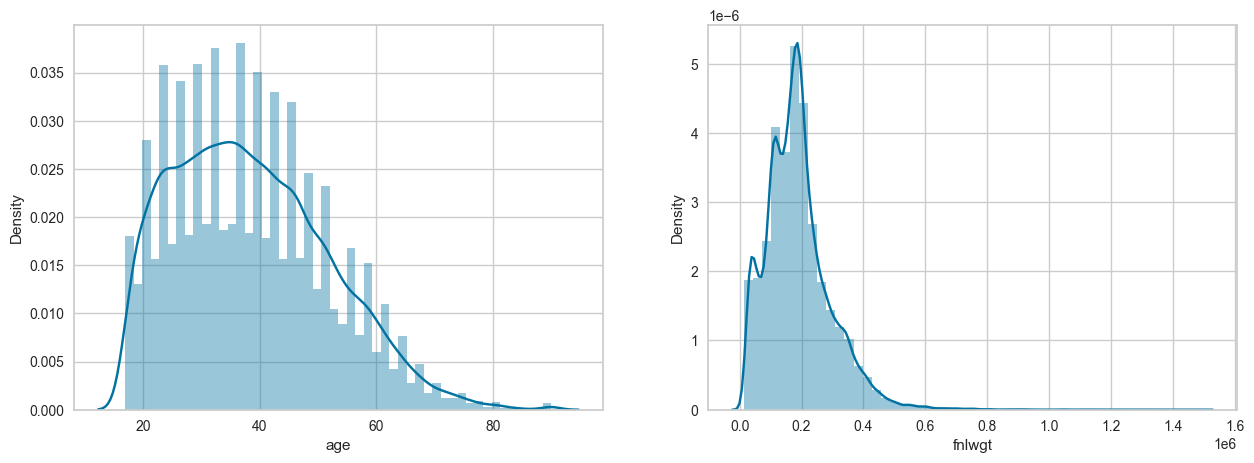

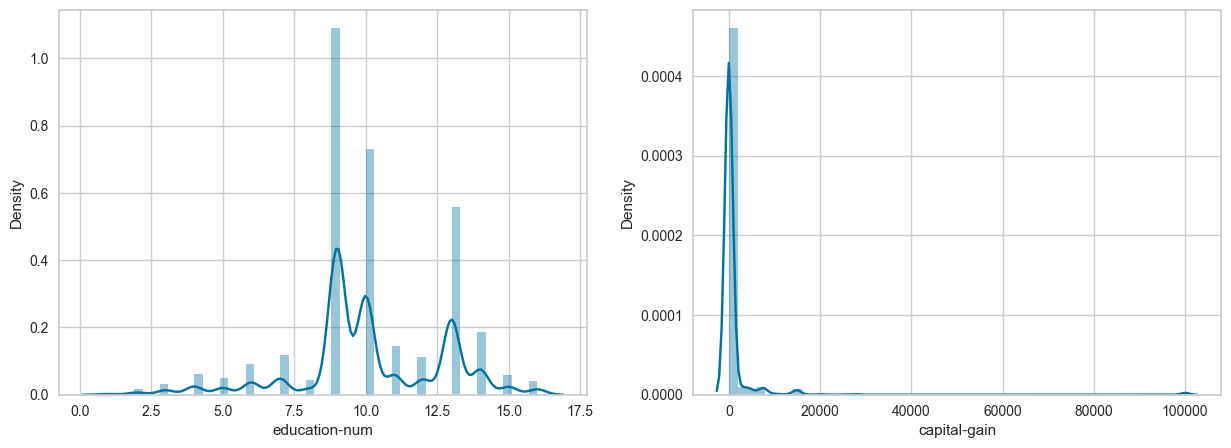

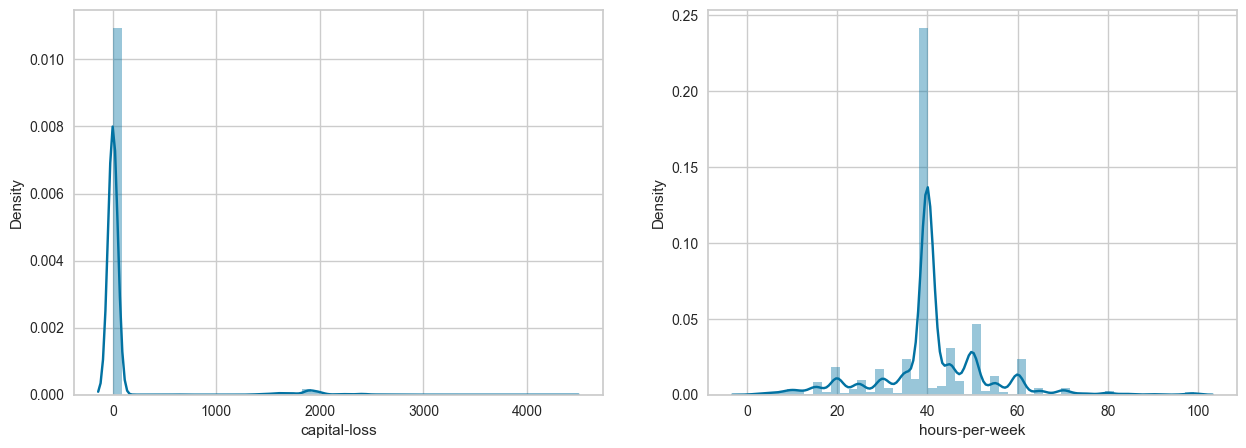

In [272]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(df.age)
plt.subplot(1, 2, 2)
sns.distplot(df['fnlwgt'])
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['education-num'])
plt.subplot(1, 2, 2)
sns.distplot(df['capital-gain'])
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['capital-loss'])
plt.subplot(1, 2, 2)
sns.distplot(df['hours-per-week'])


### Аномальных значений не выявлено.


### Построим корреляционную матрицу и проверим признаки на аномальную корреляцию.


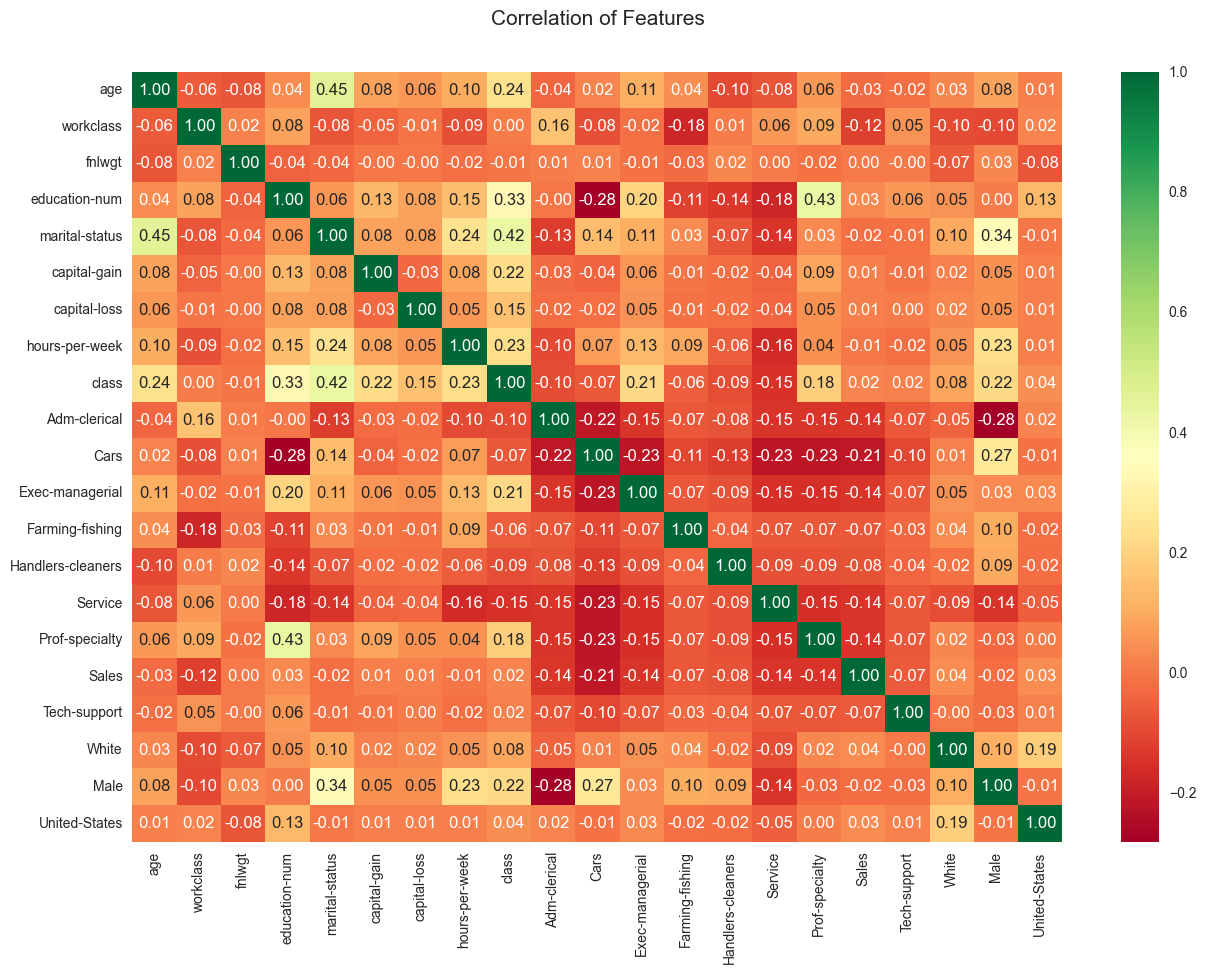

In [275]:
dfn = df.copy()
dfn['class'] = dfn['class'].replace({'<=50K':0, '>50K':1})
dfn['class'] = dfn['class'].astype(int)
plt.figure(figsize=(15, 10))
sns.heatmap(dfn.corr(), annot=True, fmt='.2f', linewidths=0, cmap='RdYlGn')
plt.title('Correlation of Features', y=1.05, size=15)
plt.show()

### Аномальных значений корреляции между признаками не обнаружено, можем переходить к моделированию.


### Разделим датасет на X и y.


In [280]:
X = dfn.drop('class', axis=1)
y = dfn['class']

### Предварительно разделим выборку на обучающую и тестовую. Будем использовать случайное разбиение, так как предоставленные данные не имеют структуры временной последовательности.


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Для начала создадим таблицу, в которую будем в дальнейшем вносить результаты, продемонстрированные моделью на тестовой выборке и время её обучения на обучающей выборке.


In [282]:
results = pd.DataFrame(columns=['Model', 'CV_accuracy', 'Accuracy_test','Precision', 'Recall', 'F1', 'Time'])
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          0 non-null      object
 1   CV_accuracy    0 non-null      object
 2   Accuracy_test  0 non-null      object
 3   Precision      0 non-null      object
 4   Recall         0 non-null      object
 5   F1             0 non-null      object
 6   Time           0 non-null      object
dtypes: object(7)
memory usage: 132.0+ bytes


### Приступим к обучению моделей.


### Создадим список моделей, которые попробуем обучить в базовой конфигурации.


In [283]:
names = ["Logistic Regression", "Ridge Classifier", "Nearest_Neighbors", "Naive_Bayes", "Decision_Tree", "Random_Forest", "Linear_SVM", 
         "Gradient_Boosting", "Neural_Net", "AdaBoost", "Quadratic_Discriminant", "Stochastic_Gradient"]


classifiers = [
    LogisticRegression(),
    RidgeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier()
]



### Обучим каждую из моделей и добавим их результаты работы в ранее созданный массив. Сразу будем использовать кросс-валидацию для оценки обучающей выборки.


In [284]:
for n, i in enumerate(classifiers):
    start_time = time.time()
    model = i
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    results.loc[len(results)] = [names[n],cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs=-1).mean(),
                                 accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
                                 recall_score(y_test, y_pred), f1_score(y_test, y_pred), end_time - start_time]

### Визуализируем полученные данные при помощи градиента, отсортировав массив по точности тестовой выборки.


In [285]:
results.sort_values(by=["Accuracy_test"], ascending=False, inplace=True)
cm = sns.light_palette("green", as_cmap=True)
s = results.style.background_gradient(cmap=cm)
s

,Model,CV_accuracy,Accuracy_test,Precision,Recall,F1,Time
7,Gradient_Boosting,0.862799,0.860761,0.782813,0.599099,0.678745,3.440940
9,AdaBoost,0.857325,0.856116,0.763626,0.599550,0.671713,1.203153
5,Random_Forest,0.853205,0.853130,0.741866,0.616216,0.673228,3.507045
1,Ridge Classifier,0.831582,0.835988,0.754665,0.491892,0.595582,0.030006
10,Quadratic_Discriminant,0.811066,0.815859,0.624495,0.627027,0.625759,0.135099
4,Decision_Tree,0.808826,0.812984,0.619198,0.618919,0.619058,0.201997
0,Logistic Regression,0.790964,0.790865,0.702836,0.256757,0.376113,0.228988
6,Linear_SVM,0.790245,0.790422,0.957746,0.153153,0.264078,85.482988
3,Naive_Bayes,0.788475,0.786330,0.637405,0.300901,0.408813,0.038999
8,Neural_Net,0.666383,0.781685,0.853448,0.133784,0.231308,4.773526


### В целом точность предсказания выше 85% - хороший результат для представленных данных. Однако результат можно улучшить, оптимизируя удачные модели.


### Значение precision во всех моделях стабильно выше чем recall, что свидетельствует о часто встречающихся ложно отрицательных значениях (модели предсказывают, что человек зарабатывает менее 50k$, хотя на самом деле больше).


### Перейдём к доработке моделей - для оптимизации возьмём первые четыре модели, показавшие наилучшие результаты в базовой конфигурации.


### Начнем с random forest модели. Посмотрим на кривые обучения и кривые регуляризации, чтобы подобрать оптимальные параметры классификатора.


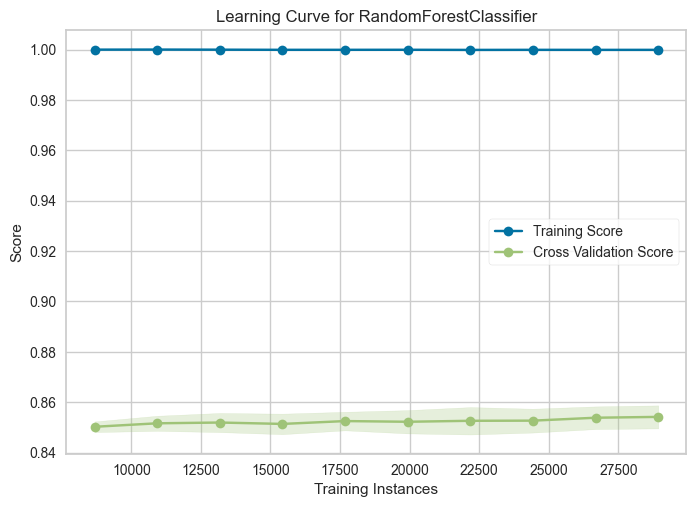

In [286]:
visualizer = LearningCurve(RandomForestClassifier(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X_train, y_train).show() 

### Базовая модель очевидно переобучена. Попробуем изменить количество деревьев, определим его с помощью кривой регуляризации.


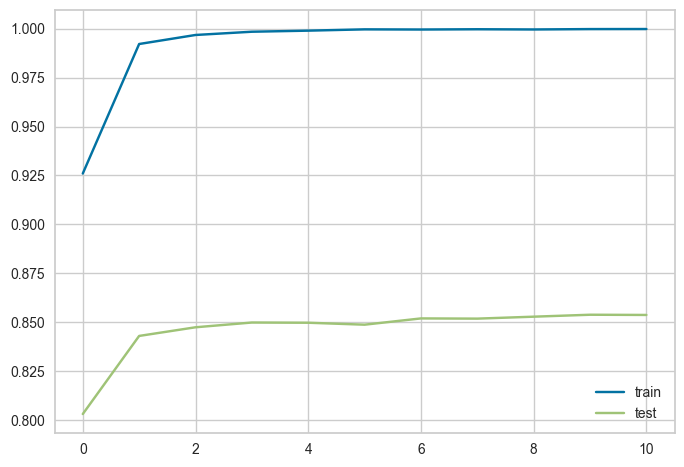

In [287]:
trains = []
tests = []
for i in range(1, 102, 10):
  ridge = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

### Видим что модель переобучена при любом количестве деревьев, поэтому попробуем изменить их глубину.


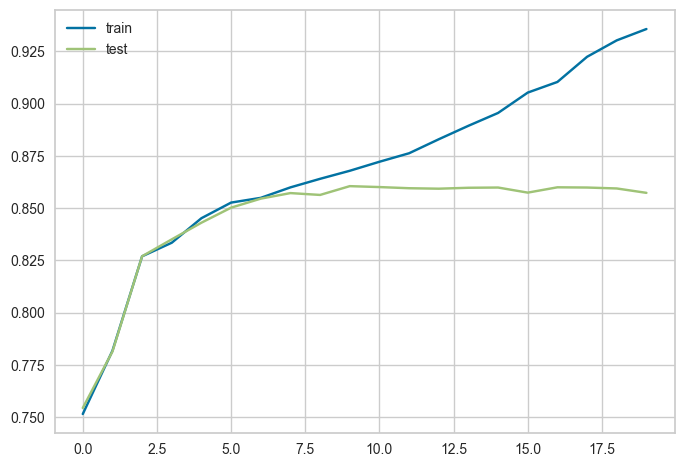

In [288]:
trains = []
tests = []
for i in range(1, 21):
  ridge = RandomForestClassifier(n_estimators=20, max_depth=i, random_state=1).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

### Здесь уже более показательный график, видим что после глубины 10 точность модели падает и начинается переобучение. Построим модель с глубиной 10 и добавим её в нашу таблицу.


In [289]:
start_time = time.time()
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
end_time = time.time()
results.loc[len(results)] = ['RF_Optimized', cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs=-1).mean(),
                                accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
                                recall_score(y_test, y_pred), f1_score(y_test, y_pred), end_time - start_time]
results.sort_values(by=["Accuracy_test"], ascending=False, inplace=True)
cm = sns.light_palette("green", as_cmap=True)
s = results.style.background_gradient(cmap=cm)
s

,Model,CV_accuracy,Accuracy_test,Precision,Recall,F1,Time
7,Gradient_Boosting,0.862799,0.860761,0.782813,0.599099,0.678745,3.440940
12,RF_Optimized,0.858514,0.859766,0.806306,0.564414,0.664017,0.368435
9,AdaBoost,0.857325,0.856116,0.763626,0.599550,0.671713,1.203153
5,Random_Forest,0.853205,0.853130,0.741866,0.616216,0.673228,3.507045
1,Ridge Classifier,0.831582,0.835988,0.754665,0.491892,0.595582,0.030006
10,Quadratic_Discriminant,0.811066,0.815859,0.624495,0.627027,0.625759,0.135099
4,Decision_Tree,0.808826,0.812984,0.619198,0.618919,0.619058,0.201997
0,Logistic Regression,0.790964,0.790865,0.702836,0.256757,0.376113,0.228988
6,Linear_SVM,0.790245,0.790422,0.957746,0.153153,0.264078,85.482988
3,Naive_Bayes,0.788475,0.786330,0.637405,0.300901,0.408813,0.038999


### Видим заметный прирост точности (более 0.5% - сильный прирост для нашего объёма выборки), при этом время выполнения алгоритма сильно сократилось.


### Оптимизируем модель ridge classifier. Для начала вновь обратимся к кривой обучения.


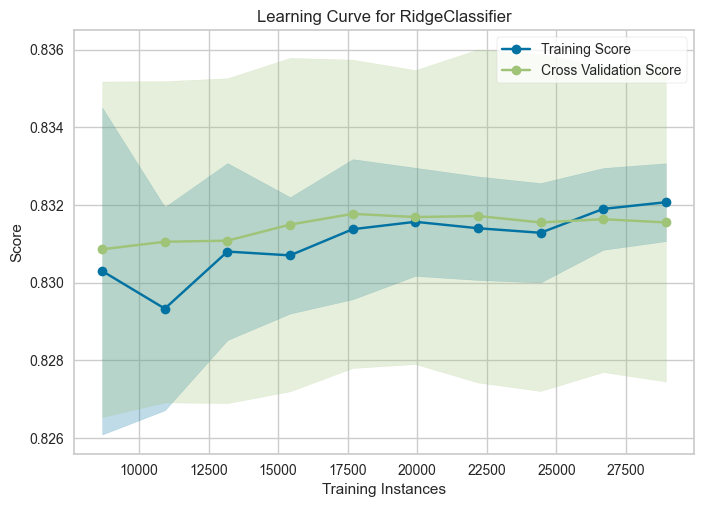

In [290]:
visualizer = LearningCurve(RidgeClassifier(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X_train, y_train).show()

### По графику можно сделать предположение о недообучении модели, однако лучше прибегнуть для анализа к кривой регуляризации.


0.8359876133598761 0.01


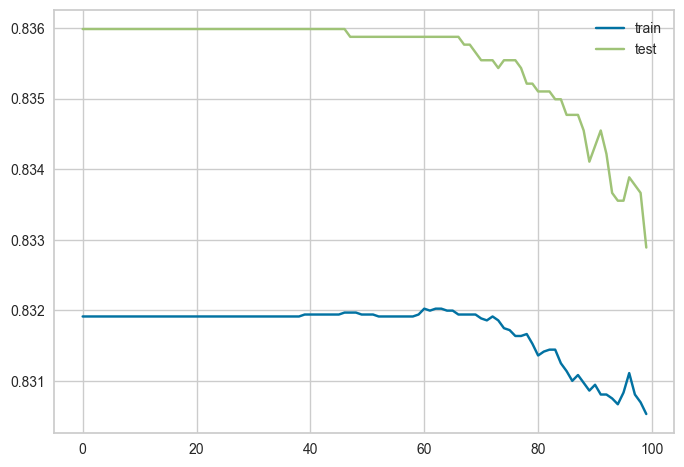

In [291]:
trains = []
tests = []
ma = 0
score = 0
for i in np.logspace(-2, 3, 100):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))
  if ma < ridge.score(X_test, y_test):
    ma = max(ridge.score(X_test, y_test), ma)
    score = i

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
print(ma, score)

### Изменение параметра регуляризации не смогло улучшить качество обучения модели. Оставим её в первоначальной конфигурации.


### Попробуем улучшить качество обучения модели AdaBoost.


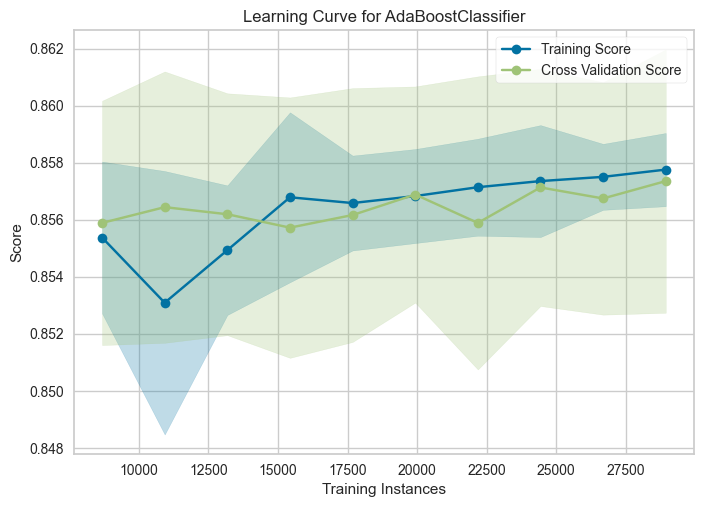

In [292]:
visualizer = LearningCurve(AdaBoostClassifier(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X_train, y_train).show()

### По графику нельзя однозначно судить о недообучении или переобучении модели. Попробуем изменять её параметры.


0.8654058836540588 600


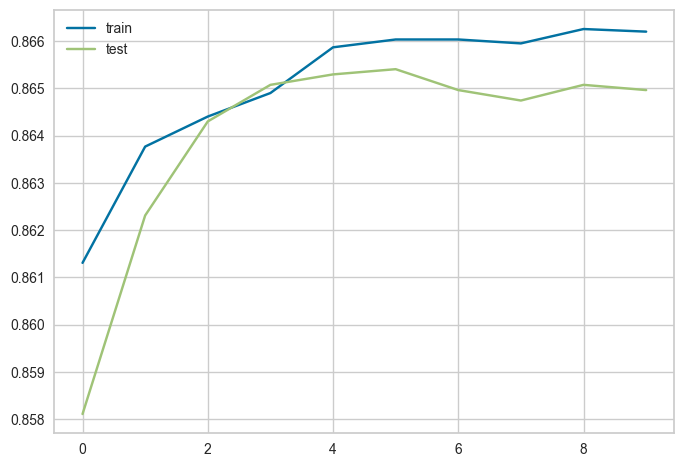

In [301]:
trains = []
tests = []
ma = 0
score = 0
for i in range(100, 1001, 100):
  ridge = AdaBoostClassifier(n_estimators=i).fit(X_train, y_train)
  trains.append(cross_val_score(ridge, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs=-1).mean())
  tests.append(ridge.score(X_test, y_test))
  if ma < ridge.score(X_test, y_test):
    ma = max(ridge.score(X_test, y_test), ma)
    score = i

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
print(ma, score)

### При оптимальном значении параметра n_estimators получилось немного улучшить модель. Внесём её в таблицу.


In [302]:
start_time = time.time()
model = AdaBoostClassifier(n_estimators=600)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
end_time = time.time()
results.loc[len(results)] = ['AB_Optimized', cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs=-1).mean(),
                                accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
                                recall_score(y_test, y_pred), f1_score(y_test, y_pred), end_time - start_time]
results.sort_values(by=["Accuracy_test"], ascending=False, inplace=True)
cm = sns.light_palette("green", as_cmap=True)
s = results.style.background_gradient(cmap=cm)
s

,Model,CV_accuracy,Accuracy_test,Precision,Recall,F1,Time
13,AB_Optimized,0.866035,0.865406,0.775701,0.635586,0.698688,11.722884
7,Gradient_Boosting,0.862799,0.860761,0.782813,0.599099,0.678745,3.440940
12,RF_Optimized,0.858514,0.859766,0.806306,0.564414,0.664017,0.368435
9,AdaBoost,0.857325,0.856116,0.763626,0.599550,0.671713,1.203153
5,Random_Forest,0.853205,0.853130,0.741866,0.616216,0.673228,3.507045
1,Ridge Classifier,0.831582,0.835988,0.754665,0.491892,0.595582,0.030006
10,Quadratic_Discriminant,0.811066,0.815859,0.624495,0.627027,0.625759,0.135099
4,Decision_Tree,0.808826,0.812984,0.619198,0.618919,0.619058,0.201997
0,Logistic Regression,0.790964,0.790865,0.702836,0.256757,0.376113,0.228988
6,Linear_SVM,0.790245,0.790422,0.957746,0.153153,0.264078,85.482988


### Попробуем улучшить показатели для лучшей из базовых моделей - градиентного бустинга.


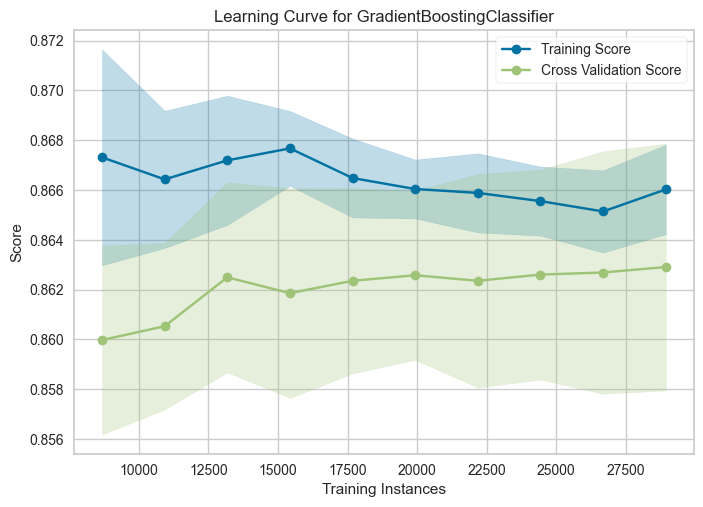

In [295]:
visualizer = LearningCurve(GradientBoostingClassifier(), train_sizes=np.linspace(0.3, 1.0, 10)).fit(X_train, y_train).show()

0.8691661136916612 281


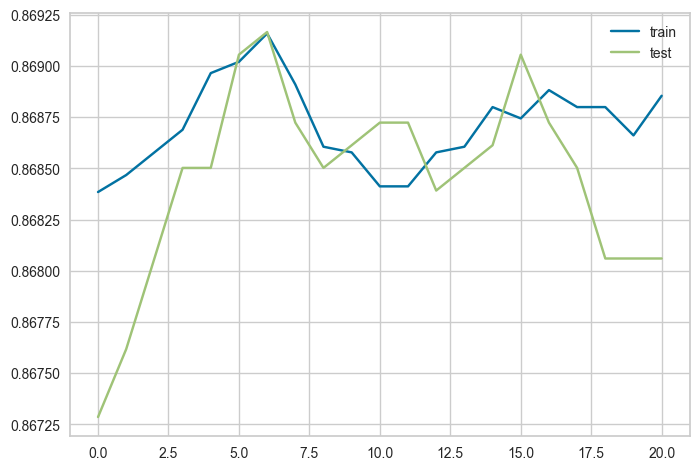

In [308]:
trains = []
tests = []
ma = 0
score = 0
for i in range(1, 501, 5):
  ridge = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
  trains.append(cross_val_score(ridge, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs=-1).mean())
  tests.append(ridge.score(X_test, y_test))
  if ma < ridge.score(X_test, y_test):
    ma = max(ridge.score(X_test, y_test), ma)
    score = i

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
print(ma, score)

### При оптимальном значении параметра n_estimators получилось немного улучшить модель. Внесём её в таблицу и будем делать выводы о проделанной работе.


In [311]:
start_time = time.time()
model = GradientBoostingClassifier(n_estimators=281)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
end_time = time.time()
results.loc[len(results)] = ['GB_Optimized', cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs=-1).mean(),
                                accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
                                recall_score(y_test, y_pred), f1_score(y_test, y_pred), end_time - start_time]
results.sort_values(by=["Accuracy_test"], ascending=False, inplace=True)
cm = sns.light_palette("green", as_cmap=True)
s = results.style.background_gradient(cmap=cm)
s

,Model,CV_accuracy,Accuracy_test,Precision,Recall,F1,Time
14,GB_Optimized,0.869187,0.869166,0.789180,0.637387,0.705208,8.940760
7,Gradient_Boosting,0.862799,0.860761,0.782813,0.599099,0.678745,3.440940
12,RF_Optimized,0.858514,0.859766,0.806306,0.564414,0.664017,0.368435
9,AdaBoost,0.857325,0.856116,0.763626,0.599550,0.671713,1.203153
5,Random_Forest,0.853205,0.853130,0.741866,0.616216,0.673228,3.507045
1,Ridge Classifier,0.831582,0.835988,0.754665,0.491892,0.595582,0.030006
10,Quadratic_Discriminant,0.811066,0.815859,0.624495,0.627027,0.625759,0.135099
4,Decision_Tree,0.808826,0.812984,0.619198,0.618919,0.619058,0.201997
0,Logistic Regression,0.790964,0.790865,0.702836,0.256757,0.376113,0.228988
6,Linear_SVM,0.790245,0.790422,0.957746,0.153153,0.264078,85.482988


## выводы:

### 1. лучшей моделью для данного датасета оказался градиентный бустинг с оптимизированными параметрами.

### 2. преимущество в качественной оценке меньше процента, поэтому имеет смысл использовать оптимизированную модель случайного леса - она работает значительно быстрее с таким же результатом.
